In [3]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Projects/data-export.csv')
data


,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
...,...,...,...,...,...,...,...,...,...,...
3178,Unassigned,2024042806,0,1,0,0,0,2,0,2
3179,Unassigned,2024043005,0,1,0,0,0,2,0,2
3180,Unassigned,2024043006,0,1,0,0,0,2,0,2
3181,Unassigned,2024050105,0,1,0,0,0,2,0,2


In [4]:
new_header = data.iloc[0]
new_header

,0
# ----------------------------------------,Session primary channel group (Default channel...
Unnamed: 1,Date + hour (YYYYMMDDHH)
Unnamed: 2,Users
Unnamed: 3,Sessions
Unnamed: 4,Engaged sessions
Unnamed: 5,Average engagement time per session
Unnamed: 6,Engaged sessions per user
Unnamed: 7,Events per session
Unnamed: 8,Engagement rate
Unnamed: 9,Event count


In [5]:

data = data[1:]
data.columns = new_header
data.reset_index(drop=True,inplace=True)
data

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001
...,...,...,...,...,...,...,...,...,...,...
3177,Unassigned,2024042806,0,1,0,0,0,2,0,2
3178,Unassigned,2024043005,0,1,0,0,0,2,0,2
3179,Unassigned,2024043006,0,1,0,0,0,2,0,2
3180,Unassigned,2024050105,0,1,0,0,0,2,0,2


In [6]:
data.columns

Index(['Session primary channel group (Default channel group)',
       'Date + hour (YYYYMMDDHH)', 'Users', 'Sessions', 'Engaged sessions',
       'Average engagement time per session', 'Engaged sessions per user',
       'Events per session', 'Engagement rate', 'Event count'],
      dtype='object', name=0)

In [7]:
print(data.describe())

0      Session primary channel group (Default channel group)  \
count                                                3182      
unique                                                  7      
top                                                Direct      
freq                                                  672      

0      Date + hour (YYYYMMDDHH) Users Sessions Engaged sessions  \
count                      3182  3182     3182             3182   
unique                      672   147      180              103   
top                  2024042417     1        1                0   
freq                          6   335      340              393   

0      Average engagement time per session Engaged sessions per user  \
count                                 3182                      3182   
unique                                2823                       808   
top                                      0                         0   
freq                                   170             

In [8]:
data['Date + hour (YYYYMMDDHH)'] = pd.to_datetime(data['Date + hour (YYYYMMDDHH)'], format='%Y%m%d%H')
data['Users'] = pd.to_numeric(data['Users'])
data['Sessions'] = pd.to_numeric(data['Sessions'])

grouped_data = data.groupby(data['Date + hour (YYYYMMDDHH)']).agg({'Users': 'sum', 'Sessions': 'sum'})
grouped_data

<ipython-input-8-55755f62860d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date + hour (YYYYMMDDHH)'] = pd.to_datetime(data['Date + hour (YYYYMMDDHH)'], format='%Y%m%d%H')
<ipython-input-8-55755f62860d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Users'] = pd.to_numeric(data['Users'])
<ipython-input-8-55755f62860d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,Users,Sessions
Date + hour (YYYYMMDDHH),,
2024-04-06 00:00:00,197,270
2024-04-06 01:00:00,107,142
2024-04-06 02:00:00,115,142
2024-04-06 03:00:00,93,122
2024-04-06 04:00:00,79,102
...,...,...
2024-05-03 19:00:00,264,324
2024-05-03 20:00:00,273,327
2024-05-03 21:00:00,315,374


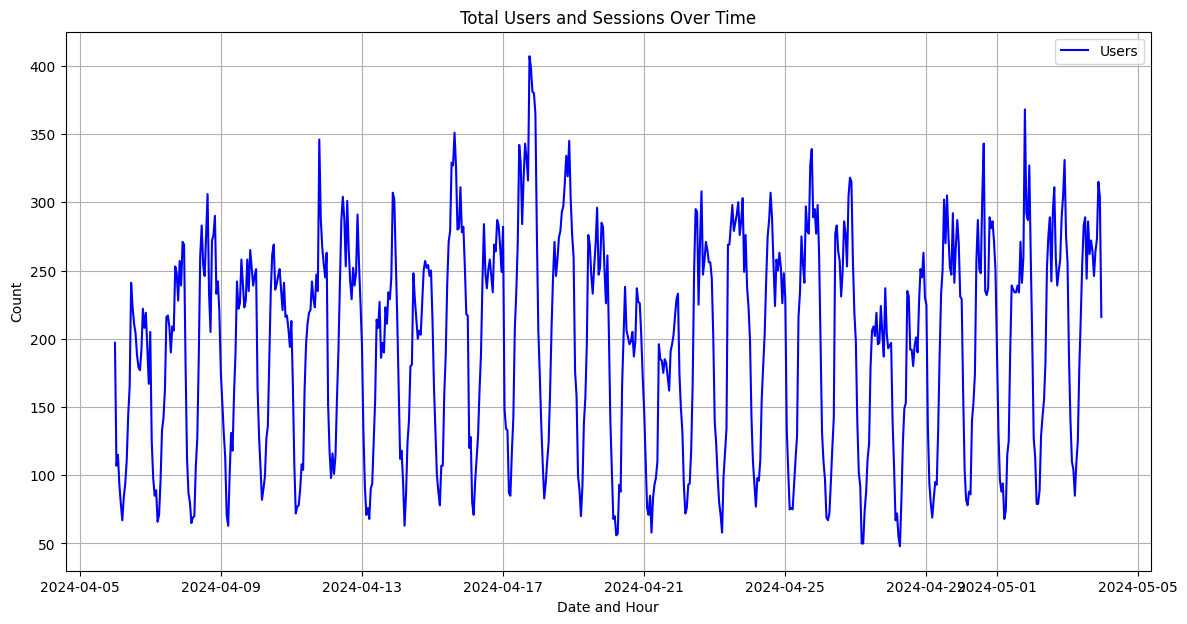

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
plt.plot(grouped_data.index,grouped_data['Users'],label='Users',color='blue')
plt.title('Total Users and Sessions Over Time')
plt.xlabel('Date and Hour')
plt.ylabel('Count')
plt.grid(True)
plt.legend()
plt.show()

In [10]:
data['Engaged sessions'] = pd.to_numeric(data['Engaged sessions'])
data['Average engagement time per session'] = pd.to_numeric(data['Average engagement time per session'])
data['Engaged sessions per user'] = pd.to_numeric(data['Engaged sessions per user'])
data['Events per session'] = pd.to_numeric(data['Events per session'])
data['Engagement rate'] = pd.to_numeric(data['Engagement rate'])





<ipython-input-10-5cc031f5c508>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Engaged sessions'] = pd.to_numeric(data['Engaged sessions'])
<ipython-input-10-5cc031f5c508>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Average engagement time per session'] = pd.to_numeric(data['Average engagement time per session'])
<ipython-input-10-5cc031f5c508>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

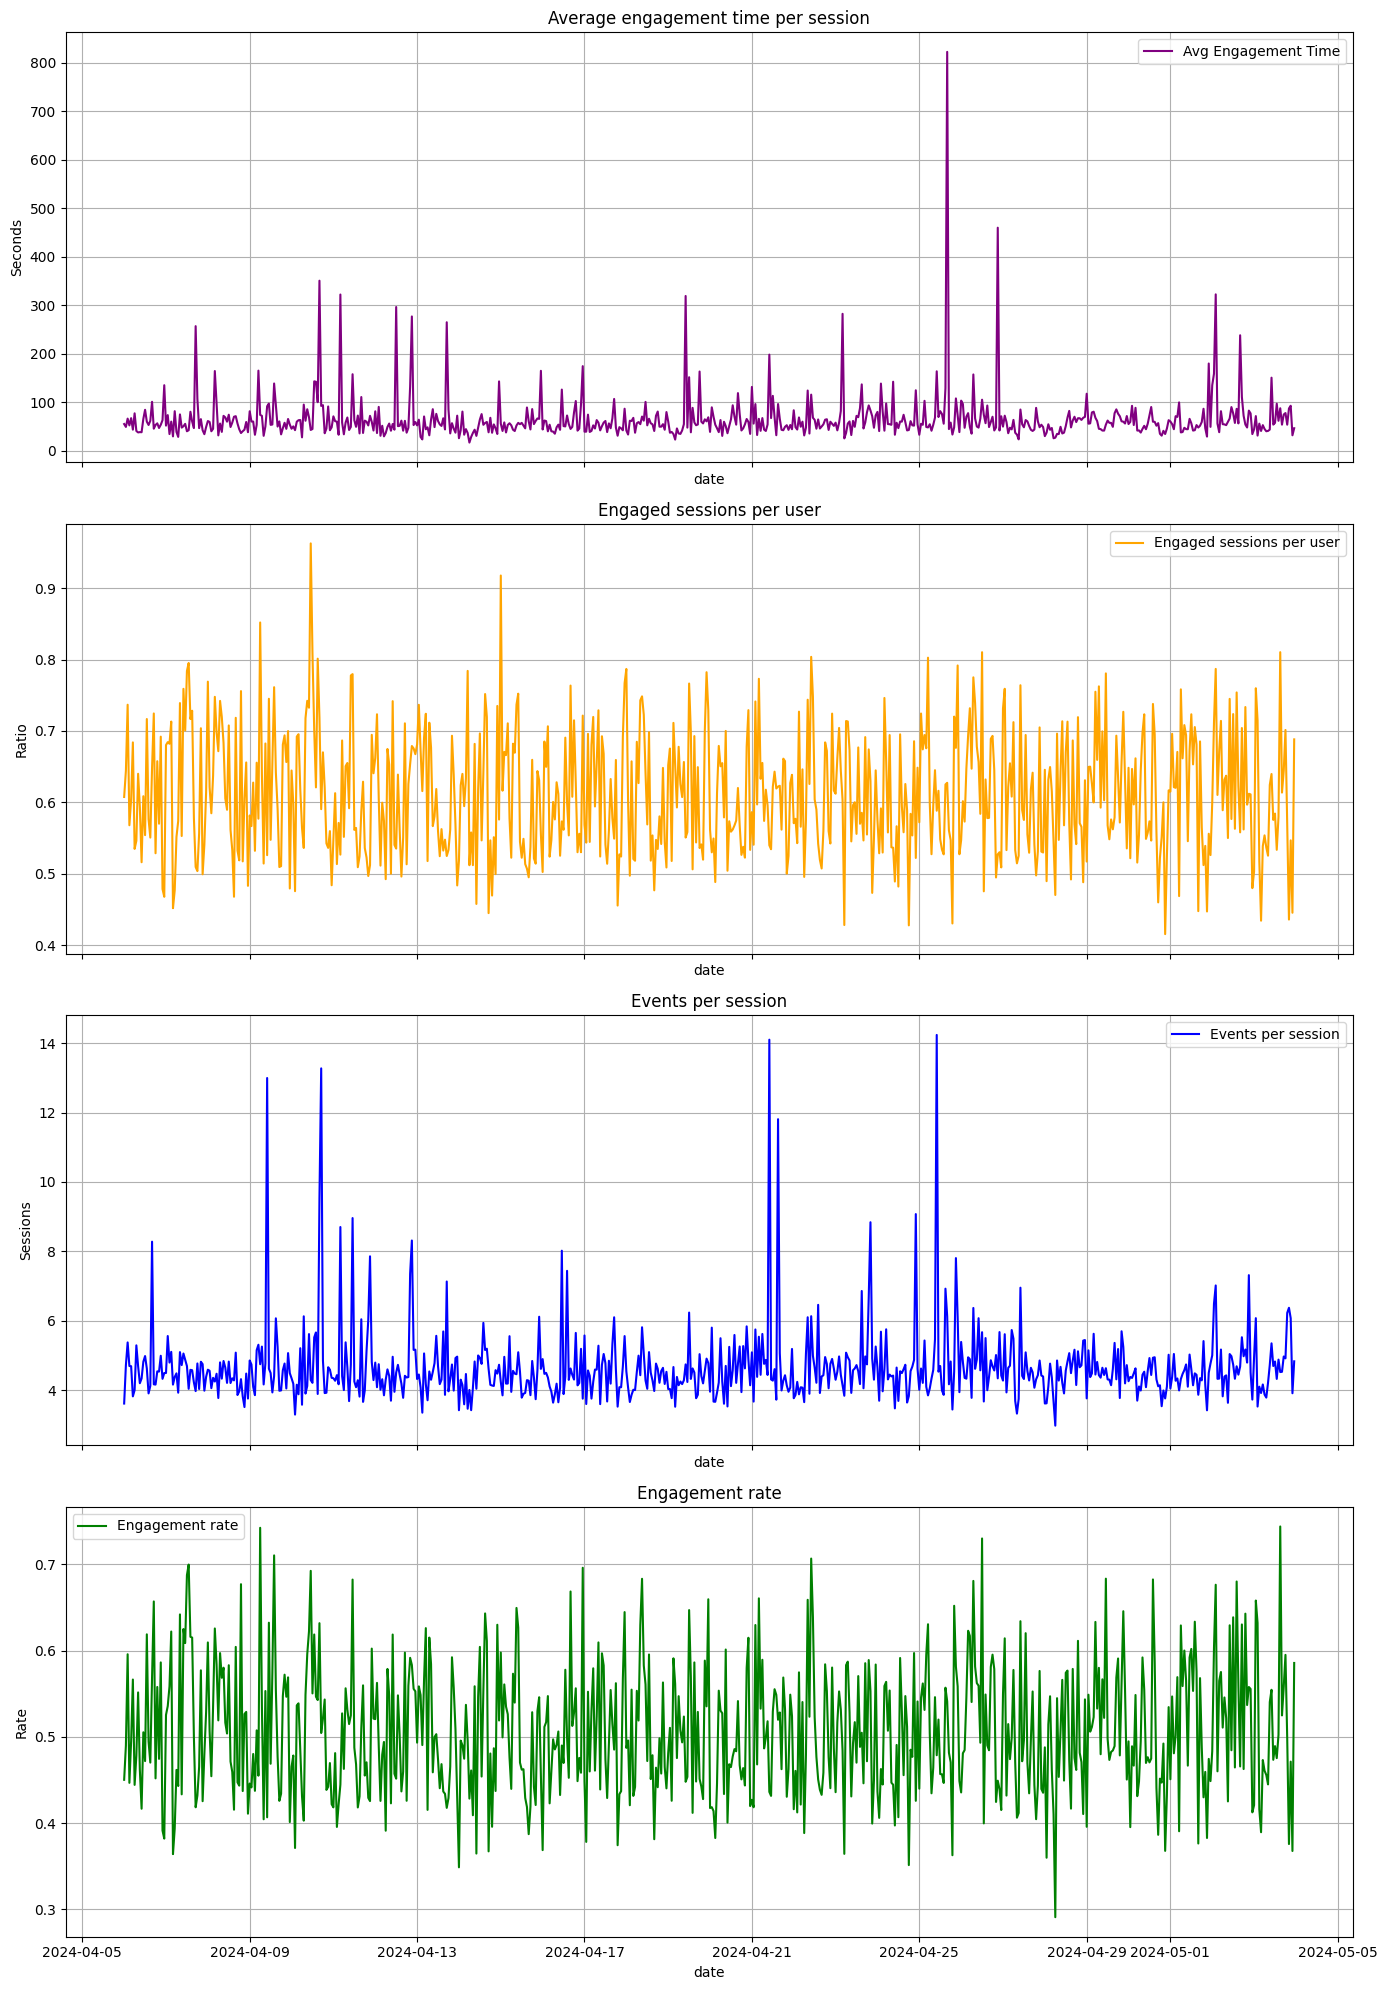

In [13]:
engagement_metrics = data.groupby(data['Date + hour (YYYYMMDDHH)']).agg({
   'Average engagement time per session': 'mean',
   'Engaged sessions per user' : 'mean',
   'Events per session' : 'mean',
   'Engagement rate' : 'mean'
})
fig,ax = plt.subplots(4,1,figsize=(14,20),sharex=True)

ax[0].plot(engagement_metrics.index,engagement_metrics['Average engagement time per session'],label='Avg Engagement Time',color='purple')
ax[0].set_title('Average engagement time per session')
ax[0].set_ylabel('Seconds')
ax[0].set_xlabel('date')


ax[1].plot(engagement_metrics.index,engagement_metrics['Engaged sessions per user'],label='Engaged sessions per user',color='Orange')
ax[1].set_title('Engaged sessions per user')
ax[1].set_ylabel('Ratio')
ax[1].set_xlabel('date')

ax[2].plot(engagement_metrics.index,engagement_metrics['Events per session'],label='Events per session',color='blue')
ax[2].set_title('Events per session')
ax[2].set_ylabel('Sessions')
ax[2].set_xlabel('date')

ax[3].plot(engagement_metrics.index,engagement_metrics['Engagement rate'],label='Engagement rate',color='green')
ax[3].set_title('Engagement rate')
ax[3].set_ylabel('Rate')
ax[3].set_xlabel('date')

for a in ax:
  a.legend()
  a.grid(True)
plt.tight_layout()
plt.show()

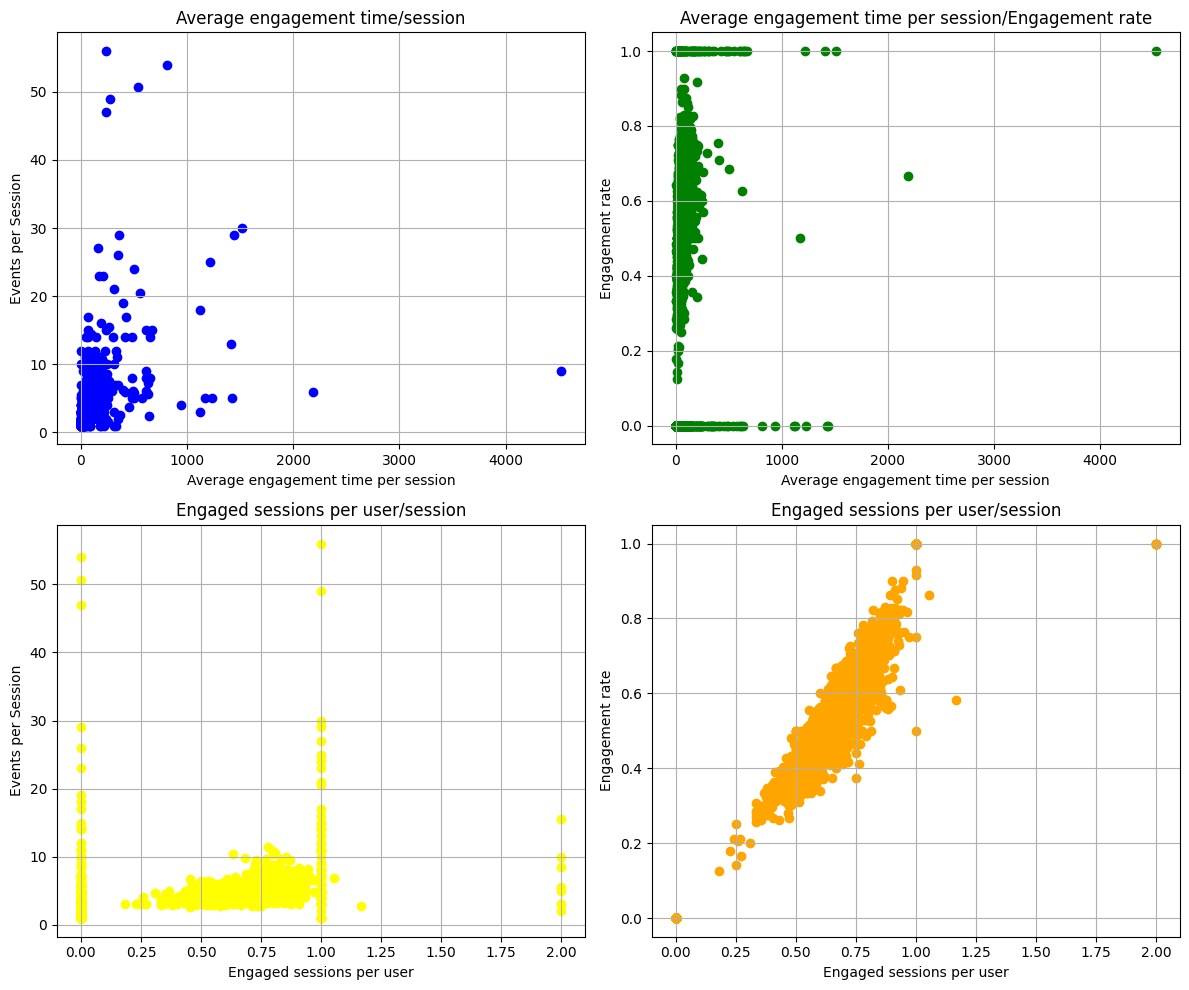

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0,0].scatter(data['Average engagement time per session'],data['Events per session'],color='blue')
axes[0,0].set_title('Average engagement time/session')
axes[0,0].set_ylabel('Events per Session')
axes[0,0].set_xlabel('Average engagement time per session')
axes[0,0].grid(True)

axes[0,1].scatter(data['Average engagement time per session'],data['Engagement rate'],color='green')
axes[0,1].set_title('Average engagement time per session/Engagement rate')
axes[0,1].set_ylabel('Engagement rate')
axes[0,1].set_xlabel('Average engagement time per session')
axes[0,1].grid(True)

axes[1,0].scatter(data['Engaged sessions per user'],data['Events per session'],color='yellow')
axes[1,0].set_title('Engaged sessions per user/session')
axes[1,0].set_ylabel('Events per Session')
axes[1,0].set_xlabel('Engaged sessions per user')
axes[1,0].grid(True)

axes[1,1].scatter(data['Engaged sessions per user'],data['Engagement rate'],color='orange')
axes[1,1].set_title('Engaged sessions per user/session')
axes[1,1].set_ylabel('Engagement rate')
axes[1,1].set_xlabel('Engaged sessions per user')
axes[1,1].grid(True)

plt.tight_layout()
plt.show()

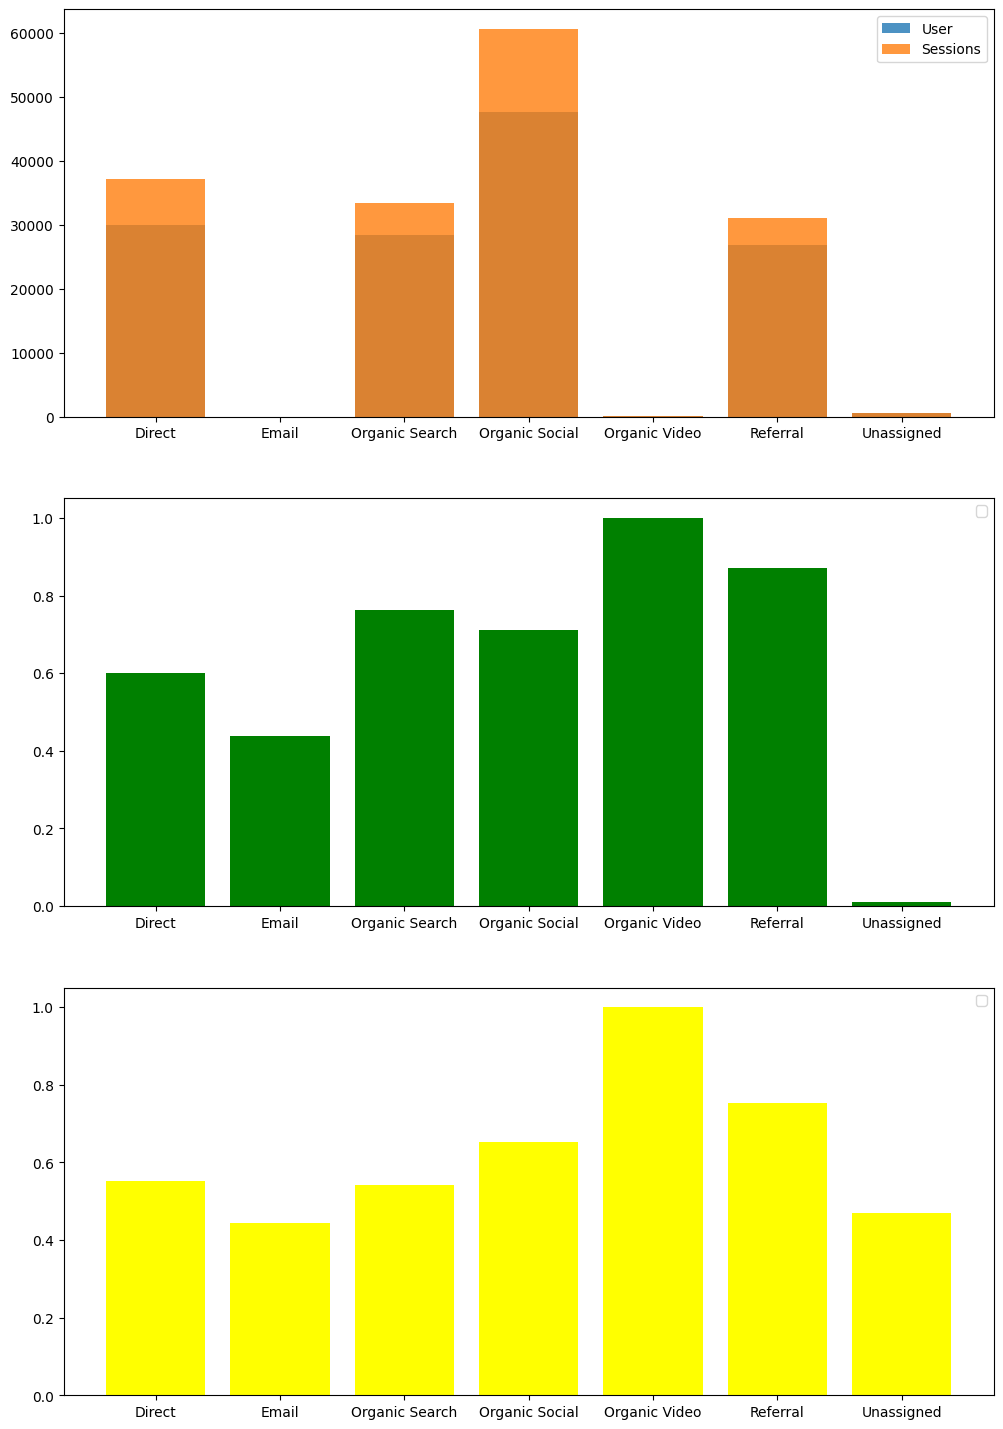

In [20]:
channel_performance = data.groupby(data['Session primary channel group (Default channel group)']).agg({
     'Users': 'sum',
    'Sessions': 'sum',
    'Engaged sessions': 'sum',
    'Engagement rate': 'mean',
    'Events per session': 'mean'
})

channel_performance['Normalized Engagement rate'] = channel_performance['Engagement rate']/channel_performance['Engagement rate'].max()
channel_performance['Normalized Events per session'] = channel_performance['Events per session']/channel_performance['Events per session'].max()

fig, ax = plt.subplots(3,1,figsize=(12,18))

ax[0].bar(channel_performance.index,channel_performance['Users'],label='User',alpha=0.8)
ax[0].bar(channel_performance.index,channel_performance['Sessions'],label='Sessions',alpha=0.8)
ax[0].set_title='Users and Sessions by Channel'
ax[0].set_ylabel='count'
ax[0].legend()

ax[1].bar(channel_performance.index,channel_performance['Normalized Engagement rate'],color='green')
ax[1].set_title='Normalized Engagement rate by Channel'
ax[1].set_ylabel='Normalized Engagement rate'
ax[1].legend()


ax[2].bar(channel_performance.index,channel_performance['Normalized Events per session'],color='yellow')
ax[2].set_title='Normalized Events per session by Channel'
ax[2].set_ylabel='Normalized Events per session'
ax[2].legend()


fig.show()




In [21]:
grouped_data

,Users,Sessions
Date + hour (YYYYMMDDHH),,
2024-04-06 00:00:00,197,270
2024-04-06 01:00:00,107,142
2024-04-06 02:00:00,115,142
2024-04-06 03:00:00,93,122
2024-04-06 04:00:00,79,102
...,...,...
2024-05-03 19:00:00,264,324
2024-05-03 20:00:00,273,327
2024-05-03 21:00:00,315,374


In [27]:
time_series_data

,Sessions
Date + hour (YYYYMMDDHH),
2024-04-06 00:00:00,270
2024-04-06 01:00:00,142
2024-04-06 02:00:00,142
2024-04-06 03:00:00,122
2024-04-06 04:00:00,102
...,...
2024-05-03 19:00:00,324
2024-05-03 20:00:00,327
2024-05-03 21:00:00,374


In [28]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
seasonal_period=24

differenced_series = time_series_data.diff().dropna()
differenced_series

<ipython-input-28-9b30a5063287>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')


,Sessions
Date + hour (YYYYMMDDHH),
2024-04-06 01:00:00,-128.0
2024-04-06 02:00:00,0.0
2024-04-06 03:00:00,-20.0
2024-04-06 04:00:00,-20.0
2024-04-06 05:00:00,-21.0
...,...
2024-05-03 19:00:00,32.0
2024-05-03 20:00:00,3.0
2024-05-03 21:00:00,47.0


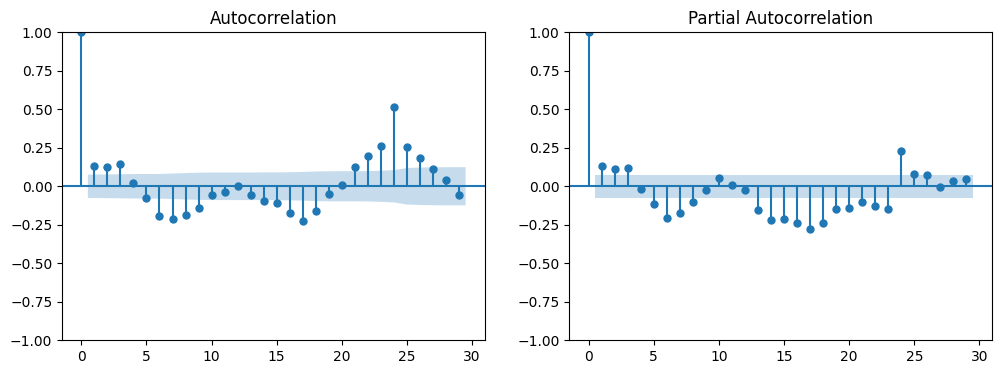

In [30]:
fig , axes = plt.subplots(1,2,figsize=(12,4))
plot_acf(differenced_series,axes[0])
plot_pacf(differenced_series,axes[1])
plt.show()

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(time_series_data,
                       order=(1,1,1),
                       seasonal_order=(1, 1, 1, seasonal_period))

sarima_model_fit = sarima_model.fit()


In [33]:
sarima_forecast = sarima_model_fit.forecast(steps=24)

In [36]:
sarima_model

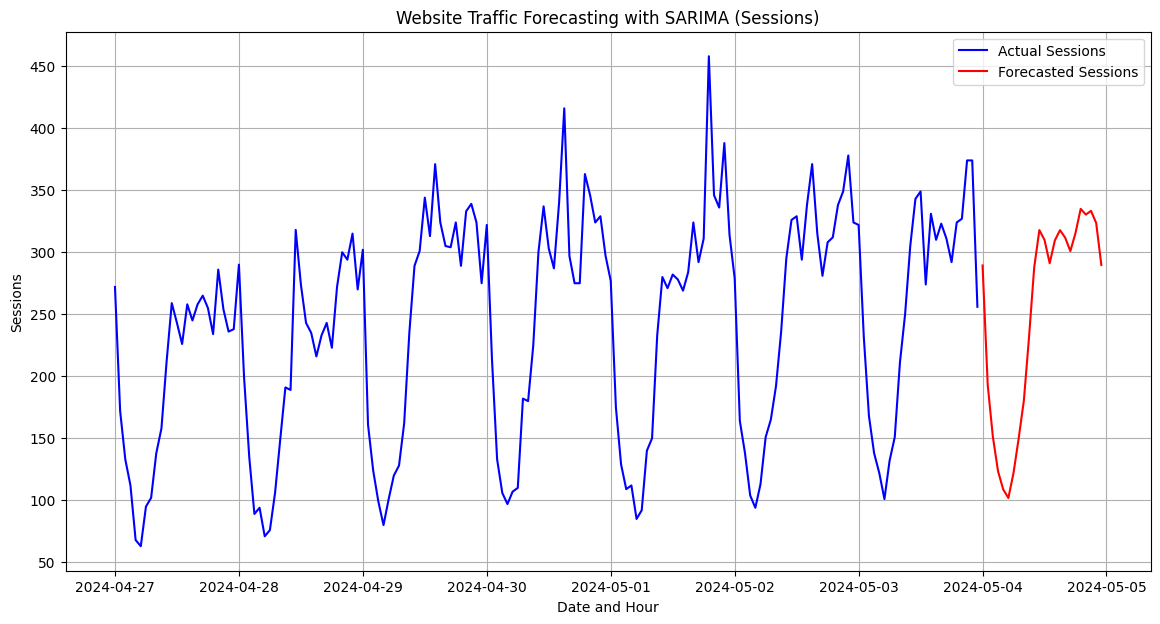

In [37]:
plt.figure(figsize=(14, 7))
plt.plot(time_series_data.index[-168:], time_series_data[-168:], label='Actual Sessions', color='blue')  # last week data
plt.plot(pd.date_range(time_series_data.index[-1], periods=25, freq='H')[1:], sarima_forecast, label='Forecasted Sessions', color='red')
plt.title('Website Traffic Forecasting with SARIMA (Sessions)')
plt.xlabel('Date and Hour')
plt.ylabel('Sessions')
plt.legend()
plt.grid(True)
plt.show()